In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Обработка результатов

## **Изучение полученных результатов из УМ**

In [41]:
def get_result(config:str,
               way_type:str,
               fault:str,
               speed:int,
               profile:str = "gost") ->pd.DataFrame:
    """
    Получение результатов расчетов по ключевым словам
    1. `config` принимает два вида строк `empty` и `loaded`
    2. `way_type` принимает три вида строк `straight`, `curve_350` и `curve_650`
    3. `fault` принимает три вида строк `normal`, `polzun15`, `ellips10`
    4. `speed` от 10 до 60 км/ч
    5. `profile` есть профили `gost`, `newwagonw`, `greb_26`, `greb_30`, `greb_28`
    """
    dictionary = {"curve_350":{20:55,
                               30:39,
                               40:28,
                               50:24,
                               60:19},
                }
    if config == "empty":
        PATH = "C:\\Users\\Daniil\\Desktop\\simulation_results\\empty"
    
    elif config == "loaded":
        PATH = "C:\\Users\\Daniil\\Desktop\\simulation_results\\loaded"
    
    name = "\\"+config+"_"+way_type+"_"+fault+"_"+str(speed)+"_"+profile+".csv"

    l_name = len(name)

    FULL_PATH = PATH+name

    file = pd.read_csv(FULL_PATH,encoding='latin-1')

    COL_NAMES = ["time_step",name[1:l_name-4]]

    file.columns = COL_NAMES

    file = file.set_index("time_step")

    if config == "curve_350":
        file = file[file.index<dictionary["curve_350"][speed]]

    
    return file


In [42]:
def get_profile_results(config:str,
                        way_type:str,
                        fault:str,
                        speed:int):
    """Результаты расчета по всем видам профилей"""
    file1 = get_result(config, way_type,fault,speed)
    file2 = get_result(config, way_type,fault,speed, "greb_26")
    file3 = get_result(config, way_type,fault,speed, "greb_28")
    file4 = get_result(config, way_type,fault,speed, "greb_30")
    file5 = get_result(config, way_type,fault,speed, "newwagonw")

    return file1,file2,file3,file4,file5

In [43]:
def plot_profile_results(config:str,way_type:str,fault:str,speed:int):
    """Создание графика сравнения результатов с разным профилем колес"""
    d={"loaded":"Груженый",
       "empty":"Порожний",
       "straight":"прямая",
       "curve_350":"кривая 350 м",
       "curve_650":"кривая 650 м",
       "normal":"без неисправностей",
       "polzun15":"ползун",
       "ellips10":"неравномерный прокат"}
    
   #  sns.set (rc={' axes.facecolor':'#C0C0C0', 'figure.facecolor':'#FFFFF0 '})
    
    files = get_profile_results(config, way_type,fault,speed)
    FILE = pd.concat(files,axis=1)
    FILE.columns = ["gost","greb_26","greb_28","greb_30","newwagonw"]

    plt.figure(figsize=(12,8))
    sns.lineplot(FILE)
    plt.title(f"{d[config]} вагон, {d[way_type]}, {d[fault]} скорость {speed} км/ч ")
    plt.xlabel("Время, с")
    plt.ylabel("Вертикальная сила, Н")
    plt.show()



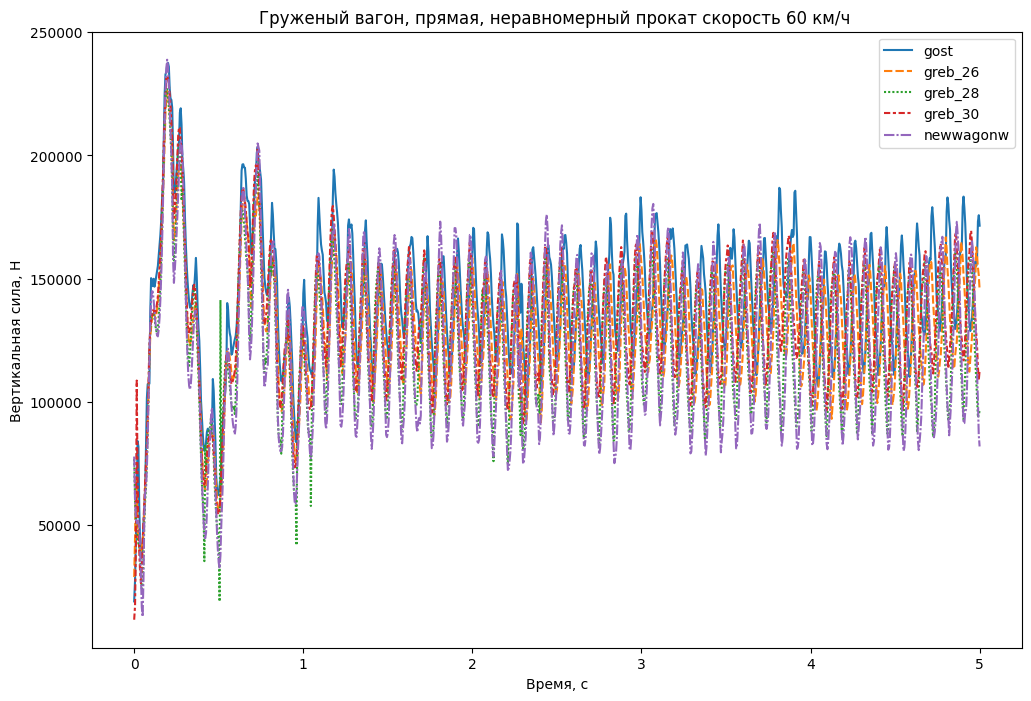

In [5]:
plot_profile_results("loaded","straight","ellips10",60)

In [6]:
empty_straight_normal_10 = get_result("empty","straight","normal",10)
empty_straight_normal_10.head()

,empty_straight_normal_10_gost
time_step,
0.000000,29575.992
0.005109,32467.777
0.010109,35095.023
0.015109,38440.480
0.020109,41884.520


In [7]:
empty_straight_normal_20 = get_result("empty","straight","normal",20)
empty_straight_normal_20.head()

,empty_straight_normal_20_gost
time_step,
0.000000,29575.992
0.005109,32136.971
0.010109,35086.570
0.015109,39165.609
0.020109,43360.832


In [44]:
def get_speed_results(config:str,
                      way_type:str,
                      fault:str,
                      profile:str = "gost") -> list[pd.DataFrame]:
    speed = [i for i in range(10,70,10)]

    results = []

    for v in speed:
        file = get_result(config,way_type,fault,profile=profile,speed=v)
        results.append(file)
    
    return results

In [56]:
# Все результаты расчетов по всем параметрам

## Порожний вагон, прямая, без неисправностей
empty_straight_normal_gost = get_speed_results("empty","straight","normal")
empty_straight_normal_greb_26 = get_speed_results("empty","straight","normal","greb_26")
empty_straight_normal_greb_28 = get_speed_results("empty","straight","normal", "greb_28")
empty_straight_normal_greb_30 = get_speed_results("empty","straight","normal", "greb_30")

## Порожний вагон, прямая, ползун 1,5 мм
empty_straight_polzun15_gost = get_speed_results("empty","straight","polzun15")
empty_straight_polzun15_greb_26 = get_speed_results("empty","straight","polzun15","greb_26")
empty_straight_polzun15_greb_28 = get_speed_results("empty","straight","polzun15", "greb_28")
empty_straight_polzun15_greb_30 = get_speed_results("empty","straight","polzun15", "greb_30")

## Порожний вагон, прямая, эллипс 10 мм
empty_straight_ellips10_gost = get_speed_results("empty","straight","ellips10")
empty_straight_ellips10_greb_26 = get_speed_results("empty","straight","ellips10","greb_26")
empty_straight_ellips10_greb_28 = get_speed_results("empty","straight","ellips10", "greb_28")
empty_straight_ellips10_greb_30 = get_speed_results("empty","straight","ellips10", "greb_30")



## Порожний вагон, кривая 350 м, без неисправностей
empty_curve_350_normal_gost = get_speed_results("empty","curve_350","normal")
empty_curve_350_normal_greb_26 = get_speed_results("empty","curve_350","normal","greb_26")
empty_curve_350_normal_greb_28 = get_speed_results("empty","curve_350","normal", "greb_28")
empty_curve_350_normal_greb_30 = get_speed_results("empty","curve_350","normal", "greb_30")

## Порожний вагон, кривая 350 м, ползун 1,5 мм
empty_curve_350_polzun15_gost = get_speed_results("empty","curve_350","polzun15")
empty_curve_350_polzun15_greb_26 = get_speed_results("empty","curve_350","polzun15","greb_26")
empty_curve_350_polzun15_greb_28 = get_speed_results("empty","curve_350","polzun15", "greb_28")
empty_curve_350_polzun15_greb_30 = get_speed_results("empty","curve_350","polzun15", "greb_30")

## Порожний вагон, кривая 350 м, эллипс 10 мм
empty_curve_350_ellips10_gost = get_speed_results("empty","curve_350","ellips10")
empty_curve_350_ellips10_greb_26 = get_speed_results("empty","curve_350","ellips10","greb_26")
empty_curve_350_ellips10_greb_28 = get_speed_results("empty","curve_350","ellips10", "greb_28")
empty_curve_350_ellips10_greb_30 = get_speed_results("empty","curve_350","ellips10", "greb_30")



## Порожний вагон, кривая 650 м, без неисправностей
empty_curve_650_normal_gost = get_speed_results("empty","curve_650","normal")
empty_curve_650_normal_greb_26 = get_speed_results("empty","curve_650","normal","greb_26")
empty_curve_650_normal_greb_28 = get_speed_results("empty","curve_650","normal", "greb_28")
empty_curve_650_normal_greb_30 = get_speed_results("empty","curve_650","normal", "greb_30")

## Порожний вагон, кривая 650 м, ползун 1,5 мм
empty_curve_650_polzun15_gost = get_speed_results("empty","curve_650","polzun15")
empty_curve_650_polzun15_greb_26 = get_speed_results("empty","curve_650","polzun15","greb_26")
empty_curve_650_polzun15_greb_28 = get_speed_results("empty","curve_650","polzun15", "greb_28")
empty_curve_650_polzun15_greb_30 = get_speed_results("empty","curve_650","polzun15", "greb_30")

## Порожний вагон, кривая 650 м, эллипс 10 мм
empty_curve_650_ellips10_gost = get_speed_results("empty","curve_650","ellips10")
empty_curve_650_ellips10_greb_26 = get_speed_results("empty","curve_650","ellips10","greb_26")
empty_curve_650_ellips10_greb_28 = get_speed_results("empty","curve_650","ellips10", "greb_28")
empty_curve_650_ellips10_greb_30 = get_speed_results("empty","curve_650","ellips10", "greb_30")


#-----------------Груженый вагон----------------


## Груженый вагон, прямая, без неисправностей
loaded_straight_normal_gost = get_speed_results("loaded","straight","normal")
loaded_straight_normal_greb_26 = get_speed_results("loaded","straight","normal","greb_26")
loaded_straight_normal_greb_28 = get_speed_results("loaded","straight","normal", "greb_28")
loaded_straight_normal_greb_30 = get_speed_results("loaded","straight","normal", "greb_30")

## Груженый вагон, прямая, ползун 1,5 мм
loaded_straight_polzun15_gost = get_speed_results("loaded","straight","polzun15")
loaded_straight_polzun15_greb_26 = get_speed_results("loaded","straight","polzun15","greb_26")
loaded_straight_polzun15_greb_28 = get_speed_results("loaded","straight","polzun15", "greb_28")
loaded_straight_polzun15_greb_30 = get_speed_results("loaded","straight","polzun15", "greb_30")

## Груженый вагон, прямая, эллипс 10 мм
loaded_straight_ellips10_gost = get_speed_results("loaded","straight","ellips10")
loaded_straight_ellips10_greb_26 = get_speed_results("loaded","straight","ellips10","greb_26")
loaded_straight_ellips10_greb_28 = get_speed_results("loaded","straight","ellips10", "greb_28")
loaded_straight_ellips10_greb_30 = get_speed_results("loaded","straight","ellips10", "greb_30")



## Груженый вагон, кривая 350 м, без неисправностей
loaded_curve_350_normal_gost = get_speed_results("loaded","curve_350","normal")
loaded_curve_350_normal_greb_26 = get_speed_results("loaded","curve_350","normal","greb_26")
loaded_curve_350_normal_greb_28 = get_speed_results("loaded","curve_350","normal", "greb_28")
loaded_curve_350_normal_greb_30 = get_speed_results("loaded","curve_350","normal", "greb_30")

## Груженый вагон, кривая 350 м, ползун 1,5 мм
loaded_curve_350_polzun15_gost = get_speed_results("loaded","curve_350","polzun15")
loaded_curve_350_polzun15_greb_26 = get_speed_results("loaded","curve_350","polzun15","greb_26")
loaded_curve_350_polzun15_greb_28 = get_speed_results("loaded","curve_350","polzun15", "greb_28")
loaded_curve_350_polzun15_greb_30 = get_speed_results("loaded","curve_350","polzun15", "greb_30")

## Груженый вагон, кривая 350 м, эллипс 10 мм
loaded_curve_350_ellips10_gost = get_speed_results("loaded","curve_350","ellips10")
loaded_curve_350_ellips10_greb_26 = get_speed_results("loaded","curve_350","ellips10","greb_26")
loaded_curve_350_ellips10_greb_28 = get_speed_results("loaded","curve_350","ellips10", "greb_28")
loaded_curve_350_ellips10_greb_30 = get_speed_results("loaded","curve_350","ellips10", "greb_30")



## Груженый вагон, кривая 650 м, без неисправностей
loaded_curve_650_normal_gost = get_speed_results("loaded","curve_650","normal")
loaded_curve_650_normal_greb_26 = get_speed_results("loaded","curve_650","normal","greb_26")
loaded_curve_650_normal_greb_28 = get_speed_results("loaded","curve_650","normal", "greb_28")
loaded_curve_650_normal_greb_30 = get_speed_results("loaded","curve_650","normal", "greb_30")

## Груженый вагон, кривая 650 м, ползун 1,5 мм
loaded_curve_650_polzun15_gost = get_speed_results("loaded","curve_650","polzun15")
loaded_curve_650_polzun15_greb_26 = get_speed_results("loaded","curve_650","polzun15","greb_26")
loaded_curve_650_polzun15_greb_28 = get_speed_results("loaded","curve_650","polzun15", "greb_28")
loaded_curve_650_polzun15_greb_30 = get_speed_results("loaded","curve_650","polzun15", "greb_30")

## Груженый вагон, кривая 650 м, эллипс 10 мм
loaded_curve_650_ellips10_gost = get_speed_results("loaded","curve_650","ellips10")
loaded_curve_650_ellips10_greb_26 = get_speed_results("loaded","curve_650","ellips10","greb_26")
loaded_curve_650_ellips10_greb_28 = get_speed_results("loaded","curve_650","ellips10", "greb_28")
loaded_curve_650_ellips10_greb_30 = get_speed_results("loaded","curve_650","ellips10", "greb_30")


## **Подготовка инфы для разделения на кастомные фолды**

Так как колесо по ГОСТ имеет радиус 475 мм, то полный оборот колеса fold = 2*pi*475

Тогда время прохождения полного оборота колеса будет равно t = fold/v 

In [57]:
def time_split(v:int) -> int:
    """Определение временного промежутка полного оборота колеса
    1. v - скорость движения поезда, км/ч
    """
    speed = v/3.6
    lenght = 2*np.pi*0.475
    t = lenght/speed
    return t

<AxesSubplot: xlabel='time_step'>

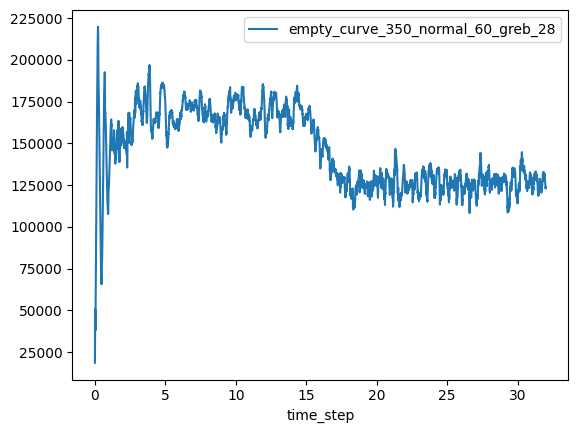

In [58]:
empty_curve_350_normal_greb_28[5].plot()

In [59]:
def get_time_splits(data:pd.DataFrame) -> list:
    """Возвращает индексы по которым нужно производить обрез
    Индексы высчтитываются в зависимости от скорости движения вагона и радиуса колеса"""
    
    res = []

    start_point = 1.4

    time_max_point = data.index.max()               # Максимальное время

    if data.columns[0].split("_")[1] == "straight":
        col_name = data.columns[0].split("_")           # 10,20,30... км/ч
        wheel_rotate_num = time_split(int(col_name[3])) # 1.007 сек

    elif data.columns[0].split("_")[1] == "curve":
        col_name = data.columns[0].split("_")           # 10,20,30... км/ч
        wheel_rotate_num = time_split(int(col_name[4])) # 1.007 сек
        
    num_folds = (time_max_point-1)//wheel_rotate_num    # Сколько всего фолдов получится сделать

    res.append(start_point)

    for _ in range(int(num_folds)):
        start_point+= wheel_rotate_num
        res.append(start_point)

    return res

In [60]:
def time_indexes(frames:list[pd.DataFrame]) -> dict:
    """Возвращает словарь индексов по которым нужно производить обрез, где
    индексы высчтитываются в зависимости от скорости движения вагона и радиуса колеса"""
    
    res = {}

    for n in range(len(frames)):
        name = frames[n].columns[0]

        res[name] = get_time_splits(frames[n])
    
    return res

In [61]:
time_indexes(empty_straight_normal_gost)

{'empty_straight_normal_10_gost': [1.4,
  2.4744246875277094,
  3.5488493750554184,
  4.6232740625831275],
 'empty_straight_normal_20_gost': [1.4,
  1.9372123437638544,
  2.474424687527709,
  3.0116370312915635,
  3.548849375055418,
  4.0860617188192725,
  4.6232740625831275,
  5.160486406346982],
 'empty_straight_normal_30_gost': [1.4,
  1.7581415625092363,
  2.1162831250184726,
  2.474424687527709,
  2.8325662500369453,
  3.1907078125461816,
  3.548849375055418,
  3.9069909375646543,
  4.265132500073891,
  4.6232740625831275,
  4.981415625092364,
  5.3395571876016],
 'empty_straight_normal_40_gost': [1.4,
  1.6686061718819272,
  1.9372123437638544,
  2.205818515645782,
  2.4744246875277094,
  2.743030859409637,
  3.0116370312915643,
  3.280243203173492,
  3.5488493750554193,
  3.817455546937347,
  4.086061718819274,
  4.354667890701202,
  4.623274062583129,
  4.891880234465057,
  5.160486406346984],
 'empty_straight_normal_50_gost': [1.4,
  1.6148849375055419,
  1.8297698750110838,
 

In [62]:
# Получение индексов полного оборота колеса

##------------Порожний вагон---------------
## Порожний вагон, прямая, без неисправностей
indexes_empty_straight_normal_gost = time_indexes(empty_straight_normal_gost)
indexes_empty_straight_normal_greb_26 = time_indexes(empty_straight_normal_greb_26)
indexes_empty_straight_normal_greb_28 = time_indexes(empty_straight_normal_greb_28)
indexes_empty_straight_normal_greb_30 = time_indexes(empty_straight_normal_greb_30)

## Порожний вагон, прямая, ползун 1,5 мм
indexes_empty_straight_polzun15_gost = time_indexes(empty_straight_polzun15_gost)
indexes_empty_straight_polzun15_greb_26 = time_indexes(empty_straight_polzun15_greb_26)
indexes_empty_straight_polzun15_greb_28 = time_indexes(empty_straight_polzun15_greb_28)
indexes_empty_straight_polzun15_greb_30 = time_indexes(empty_straight_polzun15_greb_30)

## Порожний вагон, прямая, эллипс 10 мм
indexes_empty_straight_ellips10_gost = time_indexes(empty_straight_ellips10_gost)
indexes_empty_straight_ellips10_greb_26 = time_indexes(empty_straight_ellips10_greb_26)
indexes_empty_straight_ellips10_greb_28 = time_indexes(empty_straight_ellips10_greb_28)
indexes_empty_straight_ellips10_greb_30 = time_indexes(empty_straight_ellips10_greb_30)

## Порожний вагон, кривая 350 м, без неисправностей
indexes_empty_curve_350_normal_gost = time_indexes(empty_curve_350_normal_gost)
indexes_empty_curve_350_normal_greb_26 = time_indexes(empty_curve_350_normal_greb_26)
indexes_empty_curve_350_normal_greb_28 = time_indexes(empty_curve_350_normal_greb_28)
indexes_empty_curve_350_normal_greb_30 = time_indexes(empty_curve_350_normal_greb_30)

## Порожний вагон, кривая 350 м, ползун 1,5 мм
indexes_empty_curve_350_polzun15_gost = time_indexes(empty_curve_350_polzun15_gost)
indexes_empty_curve_350_polzun15_greb_26 = time_indexes(empty_curve_350_polzun15_greb_26)
indexes_empty_curve_350_polzun15_greb_28 = time_indexes(empty_curve_350_polzun15_greb_28)
indexes_empty_curve_350_polzun15_greb_30 = time_indexes(empty_curve_350_polzun15_greb_30)

## Порожний вагон, кривая 350 м, эллипс 10 мм
indexes_empty_curve_350_ellips10_gost = time_indexes(empty_curve_350_ellips10_gost)
indexes_empty_curve_350_ellips10_greb_26 = time_indexes(empty_curve_350_ellips10_greb_26)
indexes_empty_curve_350_ellips10_greb_28 = time_indexes(empty_curve_350_ellips10_greb_28)
indexes_empty_curve_350_ellips10_greb_30 = time_indexes(empty_curve_350_ellips10_greb_30)


## Порожний вагон, кривая 650 м, без неисправностей
indexes_empty_curve_650_normal_gost = time_indexes(empty_curve_650_normal_gost)
indexes_empty_curve_650_normal_greb_26 = time_indexes(empty_curve_650_normal_greb_26)
indexes_empty_curve_650_normal_greb_28 = time_indexes(empty_curve_650_normal_greb_28)
indexes_empty_curve_650_normal_greb_30 = time_indexes(empty_curve_650_normal_greb_30)

## Порожний вагон, кривая 650 м, ползун 1,5 мм
indexes_empty_curve_650_polzun15_gost = time_indexes(empty_curve_650_polzun15_gost)
indexes_empty_curve_650_polzun15_greb_26 = time_indexes(empty_curve_650_polzun15_greb_26)
indexes_empty_curve_650_polzun15_greb_28 = time_indexes(empty_curve_650_polzun15_greb_28)
indexes_empty_curve_650_polzun15_greb_30 = time_indexes(empty_curve_650_polzun15_greb_30)

## Порожний вагон, кривая 650 м, эллипс 10 мм
indexes_empty_curve_650_ellips10_gost = time_indexes(empty_curve_650_ellips10_gost)
indexes_empty_curve_650_ellips10_greb_26 = time_indexes(empty_curve_650_ellips10_greb_26)
indexes_empty_curve_650_ellips10_greb_28 = time_indexes(empty_curve_650_ellips10_greb_28)
indexes_empty_curve_650_ellips10_greb_30 = time_indexes(empty_curve_650_ellips10_greb_30)


##------------Груженый вагон---------------

## Груженый вагон, прямая, без неисправностей
indexes_loaded_straight_normal_gost = time_indexes(loaded_straight_normal_gost)
indexes_loaded_straight_normal_greb_26 = time_indexes(loaded_straight_normal_greb_26)
indexes_loaded_straight_normal_greb_28 = time_indexes(loaded_straight_normal_greb_28)
indexes_loaded_straight_normal_greb_30 = time_indexes(loaded_straight_normal_greb_30)

## Груженый вагон, прямая, ползун 1,5 мм
indexes_loaded_straight_polzun15_gost = time_indexes(loaded_straight_polzun15_gost)
indexes_loaded_straight_polzun15_greb_26 = time_indexes(loaded_straight_polzun15_greb_26)
indexes_loaded_straight_polzun15_greb_28 = time_indexes(loaded_straight_polzun15_greb_28)
indexes_loaded_straight_polzun15_greb_30 = time_indexes(loaded_straight_polzun15_greb_30)

## Груженый вагон, прямая, эллипс 10 мм
indexes_loaded_straight_ellips10_gost = time_indexes(loaded_straight_ellips10_gost)
indexes_loaded_straight_ellips10_greb_26 = time_indexes(loaded_straight_ellips10_greb_26)
indexes_loaded_straight_ellips10_greb_28 = time_indexes(loaded_straight_ellips10_greb_28)
indexes_loaded_straight_ellips10_greb_30 = time_indexes(loaded_straight_ellips10_greb_30)

## Груженый вагон, кривая 350 м, без неисправностей
indexes_loaded_curve_350_normal_gost = time_indexes(loaded_curve_350_normal_gost)
indexes_loaded_curve_350_normal_greb_26 = time_indexes(loaded_curve_350_normal_greb_26)
indexes_loaded_curve_350_normal_greb_28 = time_indexes(loaded_curve_350_normal_greb_28)
indexes_loaded_curve_350_normal_greb_30 = time_indexes(loaded_curve_350_normal_greb_30)

## Груженый вагон, кривая 350 м, ползун 1,5 мм
indexes_loaded_curve_350_polzun15_gost = time_indexes(loaded_curve_350_polzun15_gost)
indexes_loaded_curve_350_polzun15_greb_26 = time_indexes(loaded_curve_350_polzun15_greb_26)
indexes_loaded_curve_350_polzun15_greb_28 = time_indexes(loaded_curve_350_polzun15_greb_28)
indexes_loaded_curve_350_polzun15_greb_30 = time_indexes(loaded_curve_350_polzun15_greb_30)

## Груженый вагон, кривая 350 м, эллипс 10 мм
indexes_loaded_curve_350_ellips10_gost = time_indexes(loaded_curve_350_ellips10_gost)
indexes_loaded_curve_350_ellips10_greb_26 = time_indexes(loaded_curve_350_ellips10_greb_26)
indexes_loaded_curve_350_ellips10_greb_28 = time_indexes(loaded_curve_350_ellips10_greb_28)
indexes_loaded_curve_350_ellips10_greb_30 = time_indexes(loaded_curve_350_ellips10_greb_30)


## Груженый вагон, кривая 650 м, без неисправностей
indexes_loaded_curve_650_normal_gost = time_indexes(loaded_curve_650_normal_gost)
indexes_loaded_curve_650_normal_greb_26 = time_indexes(loaded_curve_650_normal_greb_26)
indexes_loaded_curve_650_normal_greb_28 = time_indexes(loaded_curve_650_normal_greb_28)
indexes_loaded_curve_650_normal_greb_30 = time_indexes(loaded_curve_650_normal_greb_30)

## Груженый вагон, кривая 650 м, ползун 1,5 мм
indexes_loaded_curve_650_polzun15_gost = time_indexes(loaded_curve_650_polzun15_gost)
indexes_loaded_curve_650_polzun15_greb_26 = time_indexes(loaded_curve_650_polzun15_greb_26)
indexes_loaded_curve_650_polzun15_greb_28 = time_indexes(loaded_curve_650_polzun15_greb_28)
indexes_loaded_curve_650_polzun15_greb_30 = time_indexes(loaded_curve_650_polzun15_greb_30)

## Груженый вагон, кривая 650 м, эллипс 10 мм
indexes_loaded_curve_650_ellips10_gost = time_indexes(loaded_curve_650_ellips10_gost)
indexes_loaded_curve_650_ellips10_greb_26 = time_indexes(loaded_curve_650_ellips10_greb_26)
indexes_loaded_curve_650_ellips10_greb_28 = time_indexes(loaded_curve_650_ellips10_greb_28)
indexes_loaded_curve_650_ellips10_greb_30 = time_indexes(loaded_curve_650_ellips10_greb_30)

In [63]:
indexes_empty_straight_polzun15_gost

{'empty_straight_polzun15_10_gost': [1.4,
  2.4744246875277094,
  3.5488493750554184,
  4.6232740625831275],
 'empty_straight_polzun15_20_gost': [1.4,
  1.9372123437638544,
  2.474424687527709,
  3.0116370312915635,
  3.548849375055418,
  4.0860617188192725,
  4.6232740625831275,
  5.160486406346982],
 'empty_straight_polzun15_30_gost': [1.4,
  1.7581415625092363,
  2.1162831250184726,
  2.474424687527709,
  2.8325662500369453,
  3.1907078125461816,
  3.548849375055418,
  3.9069909375646543,
  4.265132500073891,
  4.6232740625831275,
  4.981415625092364,
  5.3395571876016],
 'empty_straight_polzun15_40_gost': [1.4,
  1.6686061718819272,
  1.9372123437638544,
  2.205818515645782,
  2.4744246875277094,
  2.743030859409637,
  3.0116370312915643,
  3.280243203173492,
  3.5488493750554193,
  3.817455546937347,
  4.086061718819274,
  4.354667890701202,
  4.623274062583129,
  4.891880234465057,
  5.160486406346984],
 'empty_straight_polzun15_50_gost': [1.4,
  1.6148849375055419,
  1.829769875

In [64]:
def get_splited_dataframe(data:pd.DataFrame,indexes:list) -> pd.DataFrame:
    """Разделение одного результата расчета на несколько других по полному обороту колеса
    1. `data` - датафрейм с расчетом
    2. `indexes` - индексы по которым нужно делить расчет"""
    
    zeros = np.zeros((214,1))
    common_df = pd.DataFrame(zeros)

    for i in range(len(indexes)):
        if i < len(indexes) - 1:
            seq = data[(data.index>=indexes[i]) & (data.index<=indexes[i+1])]  # срез по точкам
        else:
            seq = data[data.index>indexes[i]]
        common_df = pd.concat([common_df,seq], axis=1)
    
    df = common_df.drop(0, axis=1)
    
    return df       

**Пример разделения расчета на несколько мелких по обороту колеса**

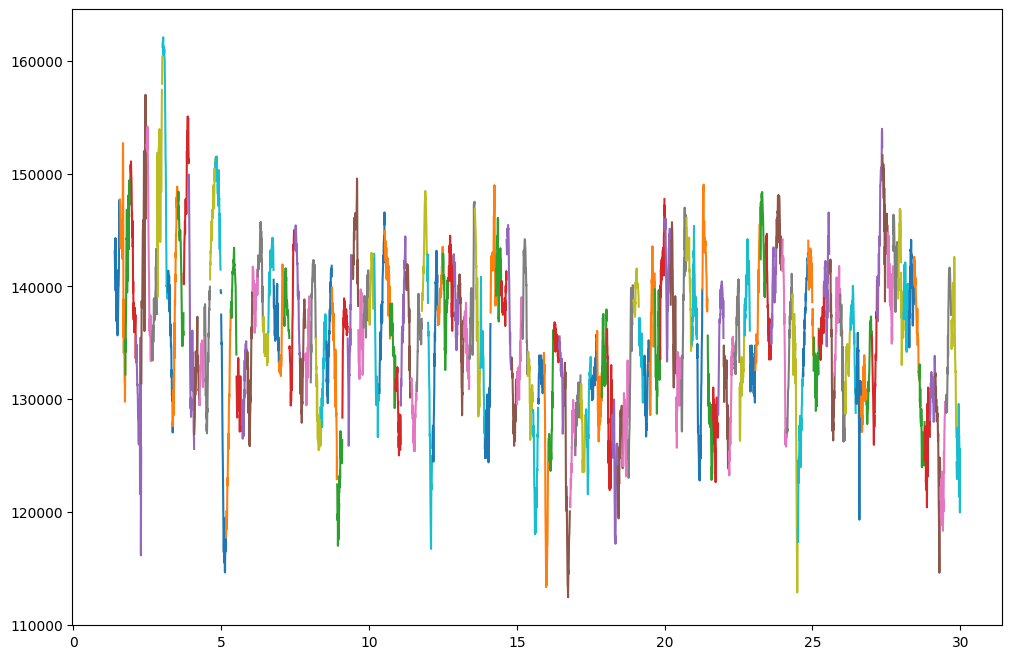

In [67]:
devided_result = get_splited_dataframe(empty_curve_650_normal_gost[5], indexes_empty_curve_650_normal_gost["empty_curve_650_normal_60_gost"])

plt.figure().set_size_inches(12,8)
plt.plot(devided_result)
plt.show()

In [ ]:
# Все разделенные расчеты
# Много кода по обработке каждого расчета
# ...

**Описание данных фолдов**

<AxesSubplot: xlabel='time_step'>

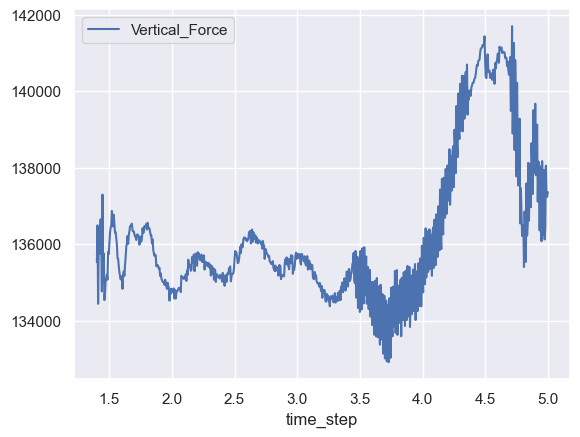

In [23]:
empty_straight_normal_10[empty_straight_normal_10.index > 1.4].plot()

In [26]:
brave_description = empty_straight_normal_10.describe().T

In [27]:
def get_min_max_delta(data:pd.DataFrame):
    max = data.max()
    min = data.min()
    return max-min

In [28]:
get_min_max_delta(empty_straight_normal_10)

Vertical_Force    199170.738
dtype: float64

In [ ]:
brave_description